In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# CSV PATHS

whale_data_path = Path("../Starter_Code/Resources/whale_returns.csv")

algo_data_path = Path("../Starter_Code/Resources/algo_returns.csv")

SAPTSX_data_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")


# Reading WHALE CSV 

whale_returns = pd.read_csv(whale_data_path)

whale_returns.sort_index()

whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [2]:
# Viewing the nulls

whale_returns.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [3]:
# Dropping the nulls 

whale_returns.dropna(inplace=True)

whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [4]:
# Reading daily Algo data

algo_returns = pd.read_csv(algo_data_path)

algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [5]:
# Viewing the nulls

algo_returns.isnull()

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [6]:
# Dropping the Nulls

algo_returns.dropna(inplace=True)

algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [7]:
# Reading S&P TSX data

sptsx_data = pd.read_csv(SAPTSX_data_path)

sptsx_data.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [8]:
# Checking the dTypes

sptsx_data.dtypes

Date     object
Close    object
dtype: object

In [9]:
# Changing the dTypes

sptsx_data ["Close"] = sptsx_data["Close"].str.replace('$', '')

sptsx_data ["Close"] = sptsx_data["Close"].str.replace(',', '')

sptsx_data.head()

<ipython-input-9-74ab9c98fc67>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sptsx_data ["Close"] = sptsx_data["Close"].str.replace('$', '')


,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99


In [10]:
# Dropping the Nulls

sptsx_data.dropna(inplace=True)

sptsx_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [11]:
# Calculate Daily Returns - Issues here getting the pct to work! I took the "()" out and now it runs without synax error

sptsx_data.pct_change

sptsx_data.head()



,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99


In [12]:
# Combining all DF together with Concat

portfolio = pd.concat([whale_returns, algo_returns, sptsx_data], axis="columns", join="inner")

portfolio.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,Close
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,10-Oct-2012,12212.42
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,11-Oct-2012,12233.95
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,12-Oct-2012,12202.04
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,15-Oct-2012,12229.96
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,16-Oct-2012,12407.70


<AxesSubplot:title={'center':'DAILY RETURNS'}>

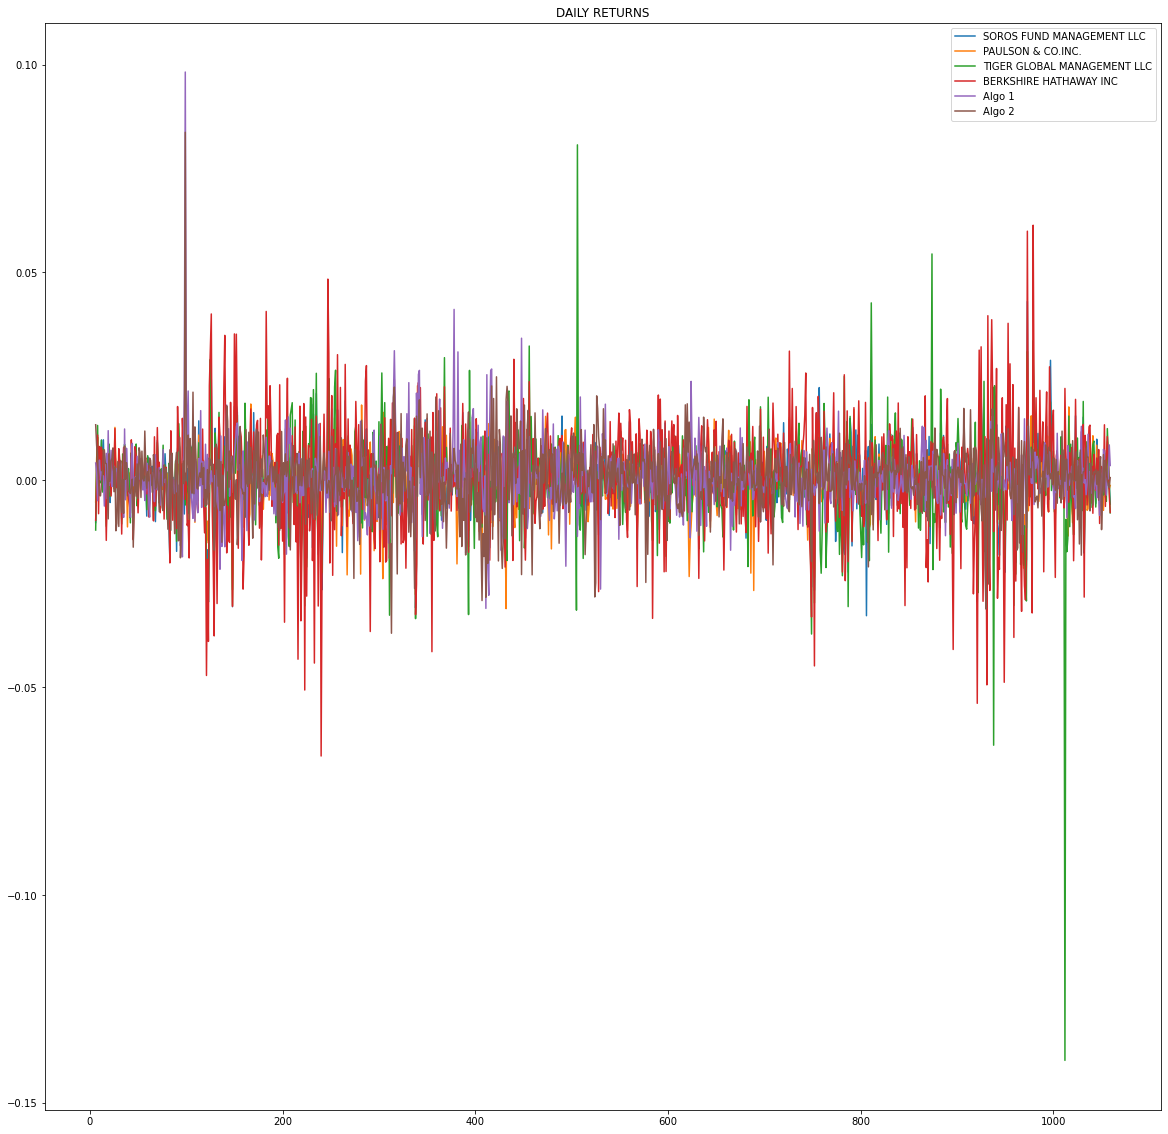

In [13]:
# Plot returns of all portfolios "DAILY"

portfolio.plot(figsize=(20, 20), title="DAILY RETURNS")

In [14]:
# Calculating the cumulative return using .cumprod "issues getting it to work"

cp = (portfolio).cumprod()

cp.plot(figsize=(20, 20), title="CUMULATIVE DAILY RETURNS")

TypeError: can't multiply sequence by non-int of type 'str'

<AxesSubplot:>

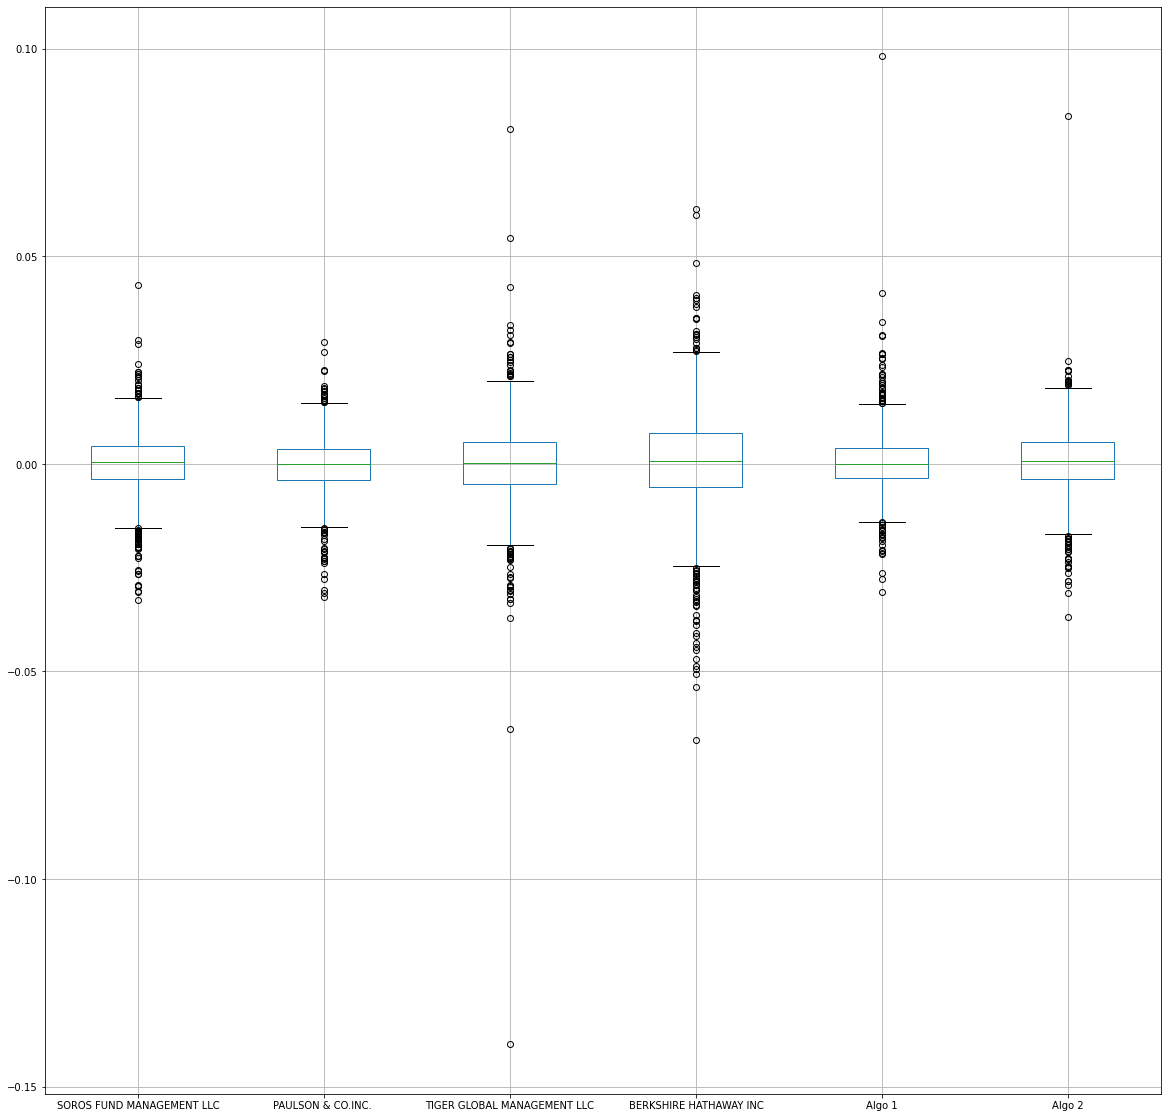

In [15]:
#BoxPlot to show Risk

portfolio.boxplot(figsize=(20,20))

In [16]:
#Calculating STD of all Portfolios

portfolio.std()

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
dtype: float64

In [18]:
# Calculate the annual standard deviation (252 days trading)

annual_std = portfolio.std() * np.sqrt(252)

annual_std

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
dtype: float64

Text(0, 0.5, 'Rolling STD')

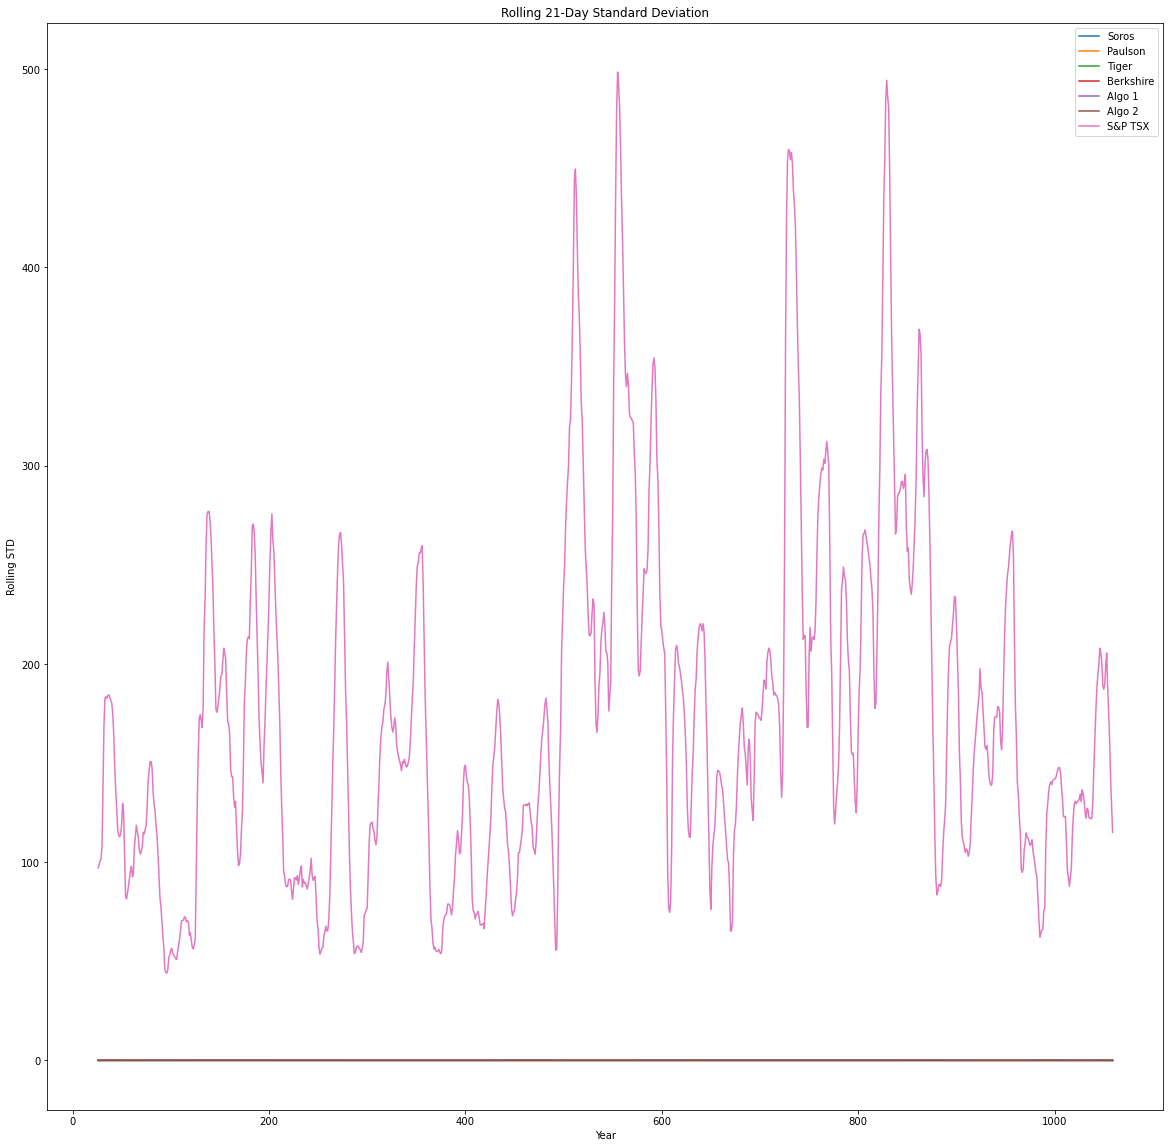

In [25]:
# Calculate the rolling standard deviation 21 Days for Portfolio

soros_rolling_std = portfolio["SOROS FUND MANAGEMENT LLC"].rolling(window=21).std()

paulson_rolling_std = portfolio["PAULSON & CO.INC. "].rolling(window=21).std()

tiger_rolling_std = portfolio["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=21).std()

berkshire_rolling_std = portfolio["BERKSHIRE HATHAWAY INC"].rolling(window=21).std()     

algo1_rolling_std = portfolio["Algo 1"].rolling(window=21).std()       

algo2_rolling_std = portfolio["Algo 2"].rolling(window=21).std()      

sp_tsx_rolling_std = portfolio["Close"].rolling(window=21).std()   
                                          

    
# Plot all rolling std's together

rolling_std = soros_rolling_std.plot(figsize=(20, 20), title="Rolling 21-Day Standard Deviation")   

paulson_rolling_std.plot(ax=rolling_std)

tiger_rolling_std.plot(ax=rolling_std)

berkshire_rolling_std.plot(ax=rolling_std)

algo1_rolling_std.plot(ax=rolling_std)

algo1_rolling_std.plot(ax=rolling_std)

sp_tsx_rolling_std.plot(ax=rolling_std)



rolling_std.legend(["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P TSX"])

rolling_std.set_xlabel("Year")

rolling_std.set_ylabel("Rolling STD")

In [26]:
# Calculate the correlation

correlation = portfolio.corr()

# Display Correlation

correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000


<AxesSubplot:>

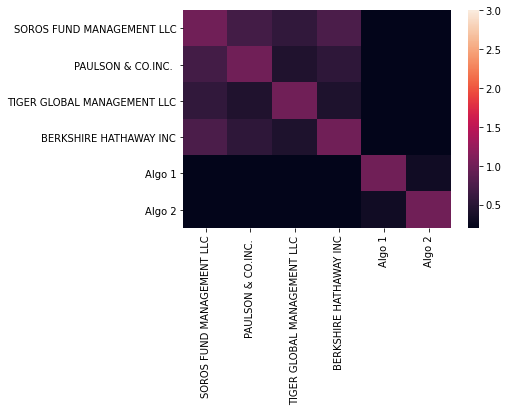

In [32]:
# Seaborn Heatmap = Correlation

sns.heatmap(correlation, vmin=0.2, vmax=3)

In [34]:
# Annual Sharpe Ratios For Portfolio (252 Days)

annual_sharpe = (portfolio.mean() * 252) / annual_std

annual_sharpe


SOROS FUND MANAGEMENT LLC      0.367157
PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
BERKSHIRE HATHAWAY INC         0.633782
Algo 1                         1.070733
Algo 2                         0.804573
dtype: float64

<AxesSubplot:title={'center':'Annual Sharpe Ratio'}>

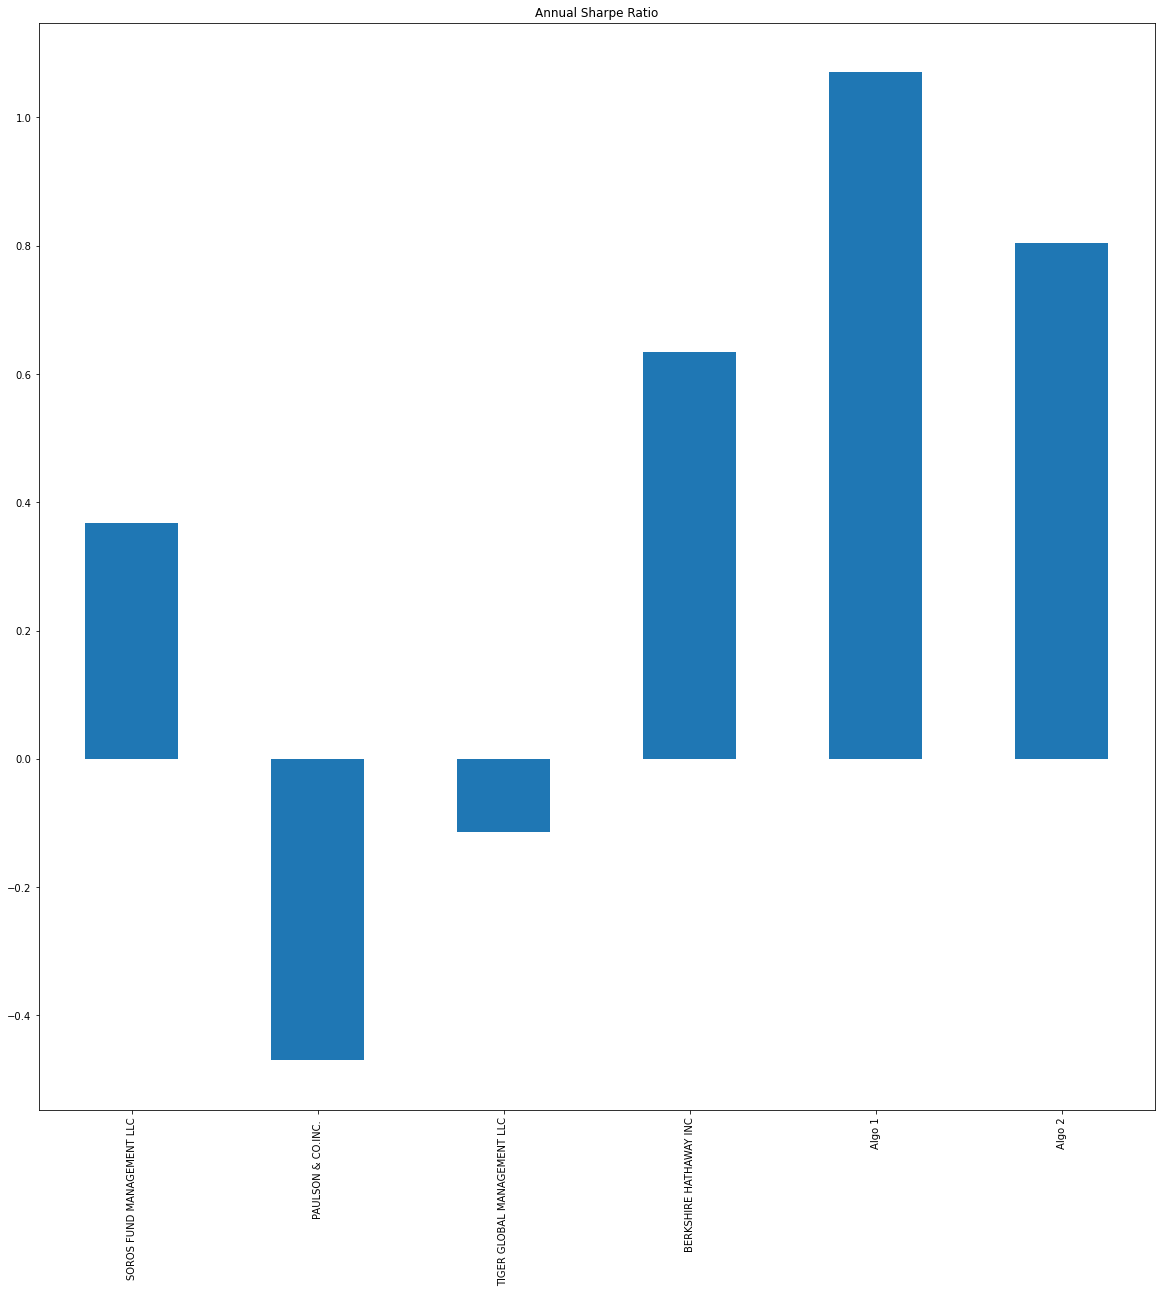

In [36]:
#Visual Sharpe Ratio

annual_sharpe.plot.bar(figsize=(20, 20), title="Annual Sharpe Ratio")